In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table
# import osc
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
from time import time

## SMSS

In [2]:
Time = time()
smss = pd.read_parquet('/arc/projects/k-pop/catalogues/adql_matches/skymapperdr2_adql_match_files/smss.parquet')
print(time()-Time)
# 57.4 s

328.5620119571686


array([[<Axes: title={'center': 'class_star'}>]], dtype=object)

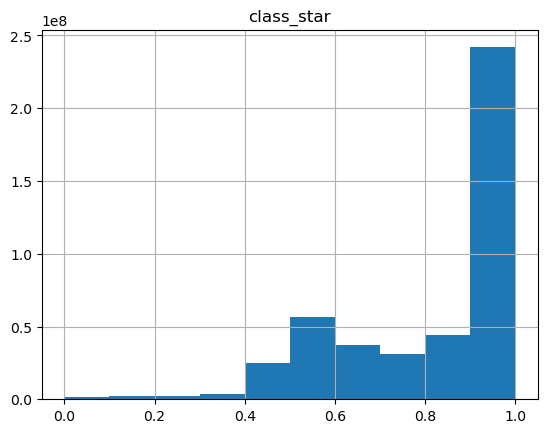

In [3]:
smss.hist('class_star')

In [4]:
mask = smss['class_star'] > 0.6
smss_filtered = smss[mask]

In [5]:
del smss

In [6]:
mask = (smss_filtered['flags'] < 4) & (smss_filtered['nimaflags'] < 5)
# smss = smss[smss['flags'] < 4]
# smss = smss[smss['nimaflags'] < 5]
smss_full_filtered = smss_filtered[mask]

In [7]:
del smss_filtered

In [8]:
smss_full_filtered

,source_id,object_id,flags,nimaflags,class_star,flags_psf,u_psf,e_u_psf,v_psf,e_v_psf,g_psf,e_g_psf,r_psf,e_r_psf,i_psf,e_i_psf,z_psf,e_z_psf,ebmv_sfd
0,6780195833444243584,1,0.0,0,0.885,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.719500,0.0491,18.585199,0.0265,0.0729
1,6780196043899539840,2,0.0,0,0.972,0,NaN,NaN,NaN,NaN,18.0858,0.0196,17.717100,0.0190,17.692200,0.0187,17.646200,0.0253,0.0729
2,6780195867803981440,3,0.0,0,0.644,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.395700,0.0944,NaN,NaN,0.0729
3,6780196078259277568,4,0.0,0,0.979,0,NaN,NaN,NaN,NaN,17.8507,0.0145,17.594601,0.0573,17.365601,0.0320,17.287800,0.0284,0.0729
4,6780196078259276672,5,0.0,0,0.981,0,NaN,NaN,NaN,NaN,17.7766,0.0418,17.206800,0.1212,16.939100,0.0109,16.828699,0.0148,0.0729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446161570,5946353221696392576,363684245,0.0,3,0.980,0,NaN,NaN,NaN,NaN,NaN,NaN,17.487700,0.0205,17.301701,0.0105,17.185699,0.0315,0.1631
446161572,5946353225996388352,363684247,0.0,3,0.966,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.267300,0.0324,18.157301,0.0176,0.1631
446161573,5946353225996388224,363684247,0.0,3,0.966,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.267300,0.0324,18.157301,0.0176,0.1631
446161574,5946353226020203648,363684248,0.0,0,0.682,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.450600,0.0801,NaN,NaN,0.1631


In [9]:
smss = smss_full_filtered.drop(columns=['object_id','flags','flags_psf','nimaflags','class_star','ebmv_sfd'])

In [10]:
del smss_full_filtered

In [11]:
smss

,source_id,u_psf,e_u_psf,v_psf,e_v_psf,g_psf,e_g_psf,r_psf,e_r_psf,i_psf,e_i_psf,z_psf,e_z_psf
0,6780195833444243584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.719500,0.0491,18.585199,0.0265
1,6780196043899539840,NaN,NaN,NaN,NaN,18.0858,0.0196,17.717100,0.0190,17.692200,0.0187,17.646200,0.0253
2,6780195867803981440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.395700,0.0944,NaN,NaN
3,6780196078259277568,NaN,NaN,NaN,NaN,17.8507,0.0145,17.594601,0.0573,17.365601,0.0320,17.287800,0.0284
4,6780196078259276672,NaN,NaN,NaN,NaN,17.7766,0.0418,17.206800,0.1212,16.939100,0.0109,16.828699,0.0148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446161570,5946353221696392576,NaN,NaN,NaN,NaN,NaN,NaN,17.487700,0.0205,17.301701,0.0105,17.185699,0.0315
446161572,5946353225996388352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.267300,0.0324,18.157301,0.0176
446161573,5946353225996388224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.267300,0.0324,18.157301,0.0176
446161574,5946353226020203648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.450600,0.0801,NaN,NaN


In [12]:
smss.to_hdf('/arc/projects/k-pop/catalogues/adql_matches/smss_curated.h5',
            key='catalog', mode='w', format='table', complib='blosc', complevel=9)

## SDSS

In [5]:
sdss = Table.read('/arc/projects/k-pop/catalogues/adql_matches/sdss.fits').to_pandas()

In [4]:
sdss

,source_id,objid,flags,flags_u,flags_g,flags_r,flags_i,flags_z,u,g,r,i,z,err_u,err_g,err_r,err_i,err_z
0,6279435494640163584,1237671992426824447,68987912448,9007199397380353,268469504,4503874773745664,268468224,275280592896,25.779900,21.603720,20.157610,19.627331,19.156931,1.293142,0.089851,0.035793,0.042690,0.086229
1,6849903358816818816,1237666183467107205,68988044032,1099646010625,275146375168,4503599895838720,268468224,275280593408,22.752670,20.220739,18.978951,18.446350,18.066660,0.634282,0.029643,0.013129,0.011534,0.027629
2,6241011175320906880,1237668627303170245,52879939469400,17867366105112,302022680,4503599929393176,302022680,302022680,21.710730,18.749920,17.625790,17.113331,16.783560,0.236337,0.009494,0.006136,0.006094,0.011866
3,6852858781651105024,1237666184540455837,68987912960,275280594176,268468224,4503599895838720,268468224,419463680,20.728720,18.145559,16.881130,16.274830,15.908940,0.103185,0.006953,0.004501,0.004439,0.007311
4,3504514200515763200,1237651697083875603,68987912192,275280592896,268468224,4503599895838720,268468224,268468224,20.629311,17.901320,16.407160,15.487990,14.961500,0.089417,0.006096,0.003941,0.003824,0.004707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119663760,1101999925669030784,1237667207287996824,68988043264,275146506240,268468224,4503599895838720,275146375168,275280592896,21.147051,19.887751,19.477659,19.315241,19.327410,0.086226,0.013967,0.013980,0.015976,0.057333
119663761,518829403657337984,1237670446226213583,68987912448,9007199397388545,275280592896,4503874773745664,268468224,275146375168,25.450871,21.468250,19.699940,18.610270,17.981131,1.019541,0.051735,0.019096,0.011708,0.019762
119663762,518466393025826816,1237670446763084118,68987912960,9007199397347585,9007199397347585,4503874782101504,275146342400,275280593408,26.886511,23.894270,21.434330,20.070110,19.148251,0.363297,0.363331,0.075863,0.034378,0.051324
119663763,2206744679037314304,1237663233361117357,35253360136208,2305843009213861905,2305843284360069136,2310346609109663760,2305843284360069136,2305843284494286864,23.724150,20.706060,19.436220,18.749649,18.237570,0.604404,0.025247,0.014090,0.012066,0.022668


In [23]:
# Keep stars that don't have critical issues: no saturation, no bad pixels, no edge effects, and not flagged as not a star
sdss = sdss[
    (sdss['flags_u'] & (1 | 2 | 8 | 64) == 0) &  # No saturation, bad pixels, edge, or not a star in u band
    (sdss['flags_g'] & (1 | 2 | 8 | 64) == 0) &  # No issues in g band
    (sdss['flags_r'] & (1 | 2 | 8 | 64) == 0) &  # No issues in r band
    (sdss['flags_i'] & (1 | 2 | 8 | 64) == 0) &  # No issues in i band
    (sdss['flags_z'] & (1 | 2 | 8 | 64) == 0)    # No issues in z band
]

In [ ]:
sdss.describe()

In [ ]:
mask = (sdss['u'] > -9999) & (sdss['g'] > -9999) & (sdss['r'] > -9999) & (sdss['i'] > -9999) & (sdss['z'] > -9999)
sdss_filtered = sdss[mask]

In [26]:
sdss_filtered.describe()

,source_id,objid,flags,flags_u,flags_g,flags_r,flags_i,flags_z,u,g,r,i,z,err_u,err_g,err_r,err_i,err_z
count,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07,4.927791e+07
mean,2.578488e+18,1.237667e+18,2.707348e+15,1.402608e+17,1.563729e+17,1.757328e+17,1.728358e+17,1.447388e+17,1.991330e+01,1.827300e+01,1.754171e+01,1.725232e+01,1.705896e+01,7.961780e-02,1.488027e-02,1.371187e-02,1.432615e-02,2.922258e-02
std,1.505561e+18,8.405214e+12,1.703555e+16,5.455983e+17,5.873553e+17,6.128320e+17,6.053632e+17,5.558303e+17,6.965405e+00,6.614581e+00,6.113674e+00,5.735896e+00,5.562367e+00,2.779362e-01,1.945952e-01,1.362391e-01,1.596707e-01,1.799545e-01
min,4.295807e+09,1.237646e+18,2.684355e+08,1.600000e+01,3.278400e+04,3.278400e+04,1.600000e+01,1.600000e+01,5.779963e+00,6.067814e+00,4.569521e+00,4.877362e+00,4.863160e+00,1.983620e-06,1.858240e-07,3.997384e-07,9.455991e-08,1.775976e-05
25%,1.351031e+18,1.237661e+18,6.898804e+10,4.026860e+08,2.684682e+08,4.503600e+15,2.684682e+08,2.685993e+08,1.885947e+01,1.722326e+01,1.648017e+01,1.615458e+01,1.590938e+01,2.099294e-02,4.917478e-03,4.546842e-03,4.721055e-03,7.002941e-03
50%,2.627792e+18,1.237666e+18,3.525336e+13,2.751799e+11,2.686034e+08,4.503600e+15,2.852454e+08,4.362404e+08,2.031596e+01,1.859076e+01,1.774977e+01,1.737806e+01,1.716620e+01,5.387046e-02,8.111426e-03,6.464294e-03,6.591560e-03,1.294514e-02
75%,3.744135e+18,1.237672e+18,3.525551e+13,2.752807e+11,2.751463e+11,4.503875e+15,2.751464e+11,2.752806e+11,2.132050e+01,1.956732e+01,1.879661e+01,1.850078e+01,1.834017e+01,1.137981e-01,1.347750e-02,1.056018e-02,1.130477e-02,2.818620e-02
max,6.917529e+18,1.237681e+18,1.369578e+18,3.317068e+18,3.388985e+18,3.330580e+18,3.326077e+18,3.388985e+18,3.550217e+01,3.790893e+01,3.316393e+01,3.678695e+01,3.400341e+01,3.936191e+02,5.677468e+02,8.264792e+01,2.536399e+02,1.294780e+02


In [27]:
import gc

In [28]:
del sdss
gc.collect()

0

In [29]:
sdss = sdss_filtered.drop(columns=['objid','flags','flags_u','flags_g','flags_r','flags_i','flags_z'])

In [30]:
del sdss_filtered
gc.collect()

0

In [31]:
sdss.to_hdf('/arc/projects/k-pop/catalogues/adql_matches/sdss_curated.h5',
            key='catalog', mode='w', format='table', complib='blosc', complevel=9)

In [32]:
sdss_to_write = Table.from_pandas(sdss)
sdss_to_write.write('/arc/projects/k-pop/catalogues/adql_matches/sdss_curated.fits',overwrite=True,format='fits')

In [33]:
del sdss
gc.collect()

0

## 2MASS

In [2]:
tm = Table.read('/arc/projects/k-pop/catalogues/adql_matches/twomass.fits').to_pandas()

In [4]:
tm.source_id.value_counts()

source_id
4508078664109639808    2
4499077477786475264    2
4510906917238558208    2
1820184806217151744    2
4321899558448170240    2
                      ..
5952734035595617024    1
5954290939753988480    1
5988159574363128064    1
5510677545983521024    1
249539219105672576     1
Name: count, Length: 468315115, dtype: int64

In [5]:
tm.ph_qual.value_counts()

ph_qual
b'AAA'    192105370
b'AAB'     39426027
b'BCU'     19870198
b'BUU'     17714782
b'ABC'     17436722
            ...    
b'XCA'            1
b'UCX'            1
b'DXB'            1
b'XDA'            1
b'FEB'            1
Name: count, Length: 403, dtype: int64

In [6]:
tm = tm[tm['ph_qual'] == b'AAA']

In [7]:
tm = tm.drop(columns=['tmass_oid','ph_qual'])

In [8]:
tm = tm.drop_duplicates(subset='source_id')

In [10]:
tm.source_id.value_counts()

source_id
5188146775028687232    1
6322051779355091968    1
6321489379157728128    1
3052605747459088896    1
4168713811758336384    1
                      ..
5387925765755707392    1
5331737560480973952    1
5952345186477987840    1
5988376182483941376    1
1976821473232698624    1
Name: count, Length: 191836317, dtype: int64

In [9]:
tm.to_hdf('/arc/projects/k-pop/catalogues/adql_matches/tmass_curated_0622.h5',
            key='catalog', mode='w', format='table', complib='blosc', complevel=9)

In [13]:
import h5py
with h5py.File('/arc/projects/k-pop/catalogues/adql_matches/smss_curated.h5', 'r') as f:
    print(list(f.keys()))  # List top-level keys
    print(list(f['catalog'].keys()))  # List keys under the dataset_name group
    data = f['catalog']['table'][:50]

['catalog']
['_i_table', 'table']


In [14]:
dataset = data
total_rows = dataset.shape[0]

for start in range(0, total_rows, 5):
    stop = min(start + 5, total_rows)
    chunk = dataset[start:stop]
    print(chunk)

[(0, [6780195833444243584], [        nan,         nan,         nan,         nan,         nan,         nan,         nan,         nan, 1.87195e+01, 4.91000e-02, 1.85852e+01, 2.65000e-02])
 (1, [6780196043899539840], [        nan,         nan,         nan,         nan, 1.80858e+01, 1.96000e-02, 1.77171e+01, 1.90000e-02, 1.76922e+01, 1.87000e-02, 1.76462e+01, 2.53000e-02])
 (2, [6780195867803981440], [        nan,         nan,         nan,         nan,         nan,         nan,         nan,         nan, 1.93957e+01, 9.44000e-02,         nan,         nan])
 (3, [6780196078259277568], [        nan,         nan,         nan,         nan, 1.78507e+01, 1.45000e-02, 1.75946e+01, 5.73000e-02, 1.73656e+01, 3.20000e-02, 1.72878e+01, 2.84000e-02])
 (4, [6780196078259276672], [        nan,         nan,         nan,         nan, 1.77766e+01, 4.18000e-02, 1.72068e+01, 1.21200e-01, 1.69391e+01, 1.09000e-02, 1.68287e+01, 1.48000e-02])]
[( 6, [6780195799084500352], [        nan,         nan,         nan, 